<a href="https://colab.research.google.com/github/AkshayBiju123/ATM/blob/main/C112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import plotly.graph_objects as go
import csv

with open("C112.csv", newline = "") as f:
  reader = csv.reader(f)
  savings_data = list(reader)
savings_data.pop(0)

df = pd.read_csv("C112.csv")

#finding total number of people who werent reminded
total_entries = len(savings_data)
total_people_given_reminder = 0

for data in savings_data:
   if int(data[3]) == 1:
     total_people_given_reminder += 1

fig= go.Figure(go.Bar(x = ["reminded","not reminded"], y = [total_people_given_reminder, total_entries - total_people_given_reminder]))
fig.show()




Finding the mean median and mode of the savings made by people

In [8]:
import statistics

all_savings = []

for data in savings_data:
  all_savings.append(float(data[0]))

mean = statistics.mean(all_savings)
print("mean", mean)

median = statistics.median(all_savings)
print("median", median)

mode = statistics.mode(all_savings)
print("mode", mode)




mean 85.32780331328739
median 39.2724
mode 0.0


In [13]:
import statistics

reminded_savings = []
not_reminded_savings = []

for data in savings_data:
  if int(data[3]) == 1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))
    

mean_of_reminded = statistics.mean(reminded_savings)
print("mean_of_reminded", mean_of_reminded)

median_of_reminded = statistics.median(reminded_savings)
print("median_of_reminded", median_of_reminded)

mode_of_reminded= statistics.mode(reminded_savings)
print("mode_of_reminded", mode_of_reminded)

mean_of_not_reminded = statistics.mean(not_reminded_savings)
print("mean_of_not_reminded", mean_of_not_reminded)

median_of_not_reminded = statistics.median(not_reminded_savings)
print("median_of_not_reminded", median_of_not_reminded)

mode_of_not_reminded= statistics.mode(not_reminded_savings)
print("mode_of_not_reminded", mode_of_not_reminded)

#finding the standard deviation of all savings, reminded savings and not reminded savings
print(f"standard deviation of all the data ->{statistics.stdev(all_savings)}")
print(f"standard deviation of the reminded people->{statistics.stdev(reminded_savings)}")
print(f"standard deviation of the people that werent reminded->{statistics.stdev(not_reminded_savings)}")

mean_of_reminded 82.56940908263547
median_of_reminded 39.2724
mode_of_reminded 0.0
mean_of_not_reminded 89.67095185226523
median_of_not_reminded 36.0475
mode_of_not_reminded 0.0
standard deviation of all the data ->196.75453011909315
standard deviation of the reminded people->173.24866414440817
standard deviation of the people that werent reminded->228.875050299707


Finding the correlation 

In [12]:
import numpy as np

age = []
savings = []
for data in savings_data:
  if float(data[5]) != 0:
    age.append(float(data[5]))
    savings.append(float(data[0]))

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")

import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Correlation between the age of the person and their savings is - 0.03663447975985462


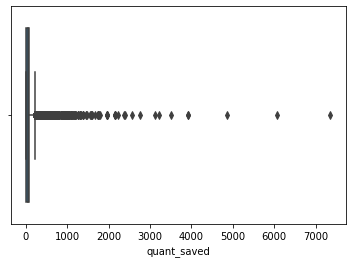

In [14]:
import seaborn as sns
sns.boxplot(data = df,x = df["quant_saved"])

In [17]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1
print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Upper_Whisker - {upper_whisker}")
print(f"Lower_Whisker - {lower_whisker}")

#creating a new dataframe

new_df = df[df["quant_saved"]< upper_whisker]



Q1 - 2.284
Q3 - 86.514
IQR - 84.22999999999999
Upper_Whisker - 212.85899999999998
Lower_Whisker - -124.06099999999998


mean, median and mode of savings

In [25]:
all_savings = new_df["quant_saved"].tolist()
mean = statistics.mean(all_savings)
print("mean", mean)

median = statistics.median(all_savings)
print("median", median)

mode = statistics.mode(all_savings)
print("mode", mode)


fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist = False)
fig.show()

mean 46.20051938981879
median 36.0475
mode 0.0


### Finding 1000 samples of 100 data points

In [35]:
import random 

sampling_mean_list  = []

for i in range(0,1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))
mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["savings(sampling)"], show_hist= False)
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling],y = [0,0.1], mode = "lines", name="mean" ))
fig.show()




print(f"mean of population - {statistics.mean(all_savings)}")
print(f"mean of sampling distribuition - {mean_sampling}")





mean of population - 46.20051938981879
mean of sampling distribuition - 46.13404662708646


In [37]:
temp_df = new_df[new_df.age!=0]


age = temp_df["age"].tolist()
savings = temp_df["quant_saved"].tolist()
  
correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")

import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)

Correlation between the age of the person and their savings is - 0.08561544120342092


In [40]:
reminded_df = new_df.loc[new_df["rem_any"]== 1]
not_reminded_df = new_df.loc[new_df["rem_any"]==0]

print(reminded_df.head())
print(not_reminded_df.head()) 

fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["savings of not reminded"], show_hist= False)
fig.show()